In [1]:
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File paths to all CSV files
csvs = glob.glob('../annotations/*/eaf.csv/*.csv')

# Dataframe consisting of concatenated dataframes for each CSV file
df = pd.concat(pd.read_csv(csv) for csv in csvs)

# Select the gesture type and duration columns
df = df[['type', 'during_time']]

# Rename 'during_time' column to 'duration'
df = df.rename(columns={"during_time": "duration"})

# Convert the 'duration' column to an integer
df = df.astype({'duration': 'int32'})

In [3]:
# Create a mapping for the head gesture labels to full names
gestures = {
    "nd":  ("Nod", "Down-up motion"),
    "mnd": ("Multiple nods", "Sequence of multiple nods"),
    "fu":  ("Face up", "Face moves in the upward direction"),
    "fd":  ("Face down", "Face moves in the downward direction"),
    "sh":  ("Shake", "Head shakes (left-right motion)"),
    "ti":  ("Tilt", "Head tilts (to the left or right)"),
    "t":   ("Turn", "Left or right head turn (partial shake)")
}

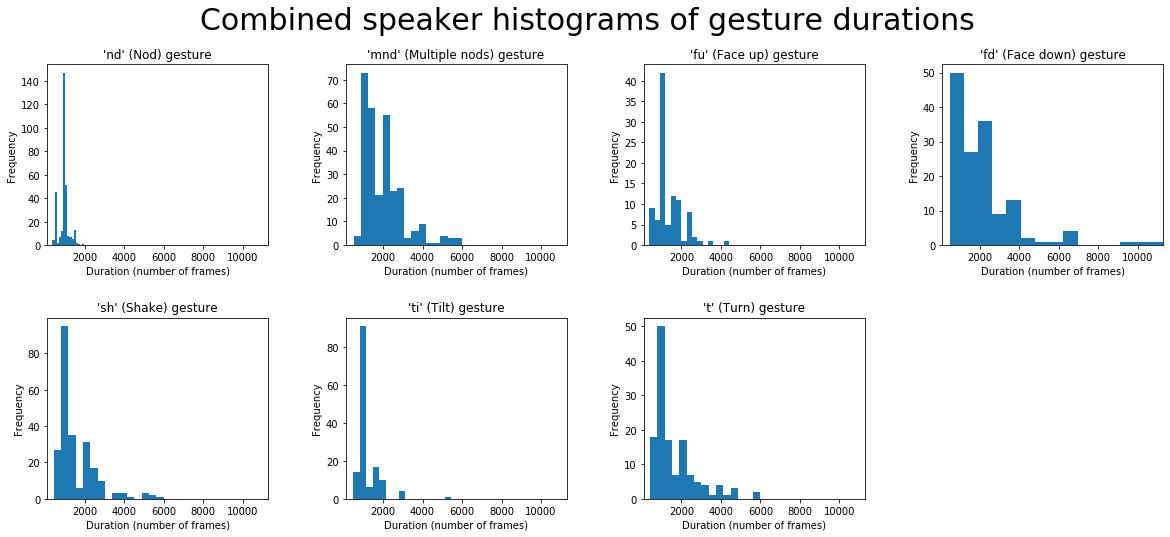

In [4]:
# Configure subplots, figure size, spacing and title
fig, axs = plt.subplots(2, 4, figsize=(20, 8))
fig.subplots_adjust(hspace=.4, wspace=.35, top=0.88) # Top gives space for title
fig.suptitle('Combined speaker histograms of gesture durations', fontsize=30)

for i, (gesture, info) in enumerate(gestures.items()):
    # Select the rows for the particular gesture
    gesture_df = df[df['type'] == gesture]
    
    # Retrieve the gesture name and description
    name, desc = info
    
    # Retrieve the plot axis object for this gesture
    ax = axs.flat[i]
    
    # Plot the histogram of durations for this gesture
    gesture_df.plot.hist(by='duration', bins=15, ax=ax)
    
    # Modify titles, axis labels and legend
    ax.set_title(f"'{gesture}' ({name}) gesture")
    ax.set_xlabel("Duration (number of frames)")
    ax.get_legend().remove()
    
    # Make x axis scales the same
    ax.set(xlim=(df['duration'].min(), df['duration'].max()))
    
# Remove the last (empty) subplot
axs.flat[-1].remove()

# Display the plot
plt.show()

In [5]:
def plot_speaker_gesture_durations_by_personality(speaker):
    # Configure subplots, figure size, spacing and title
    fig, axs = plt.subplots(2, 4, figsize=(20, 8))
    fig.subplots_adjust(hspace=.4, wspace=.35, top=0.88) # Top gives space for title
    fig.suptitle(f"Histograms of gesture duration by personality (for speaker {speaker})", fontsize=30)

    # File paths to all of the speakers CSV files
    personalities = ['neutral', 'extrovert', 'introvert']
    
    speaker_csvs = {
        "neutral": f"../annotations/{speaker}/eaf.csv/{speaker.lower()}_01_n.eaf.csv",
        "extrovert": f"../annotations/{speaker}/eaf.csv/{speaker.lower()}_02_e.eaf.csv",
        "introvert": f"../annotations/{speaker}/eaf.csv/{speaker.lower()}_03_i.eaf.csv"
    }
    
    # Create a separate dataframe for each personality
    dfs = {personality:pd.read_csv(speaker_csvs[personality]) for personality in personalities}
    
    # Select the gesture type and duration columns from each dataframe
    dfs = {personality:_df[['type', 'during_time']] for personality, _df in dfs.items()}
    
    # Rename 'during_time' column to 'duration' for each dataframe
    dfs = {personality:_df.rename(columns={"during_time": "duration"}) for personality, _df in dfs.items()}

    # Convert the 'duration' column to an integer for each dataframe
    dfs = {personality:_df.astype({'duration': 'int32'}) for personality, _df in dfs.items()}  
    
    plots = []
    
    for i, (gesture, info) in enumerate(gestures.items()):
        # Retrieve the plot axis object for this gesture
        ax = axs.flat[i]
        
        # Retrieve the gesture name and description
        name, desc = info
        
        for j, (personality, _df) in enumerate(dfs.items()):
            # Select the rows for the particular gesture
            gesture_df = _df[_df['type'] == gesture]
            
            # Skip histogram if there is no data for this personality and gesture combo
            if gesture_df.shape[0] == 0:
                continue
            
            # Plot the histogram of durations for this gesture
            plot = gesture_df.plot.hist(by='duration', bins=15, ax=ax, alpha=0.5)
            plots.append(plot)
            
            # Modify titles, axis labels and legend
            ax.set_title(f"'{gesture}' ({name}) gesture")
            ax.set_xlabel("Duration (number of frames)")
            ax.get_legend().remove()
            
            # Make x axis scales the same
            ax.set(xlim=(_df['duration'].min(), _df['duration'].max()))
            
    # Remove the last (empty) subplot
    axs.flat[-1].remove()
    
    legend = fig.legend(plots,
        labels=['Neutral', 'Extrovert', 'Introvert'],
        loc="lower right",
        bbox_to_anchor=(0.75, 0.175),
        borderaxespad=0.1,
        title="Gestures",
        prop={'size': 12}
    )
    legend.get_title().set_fontsize('15')
    
    # Display the plot
    plt.show()

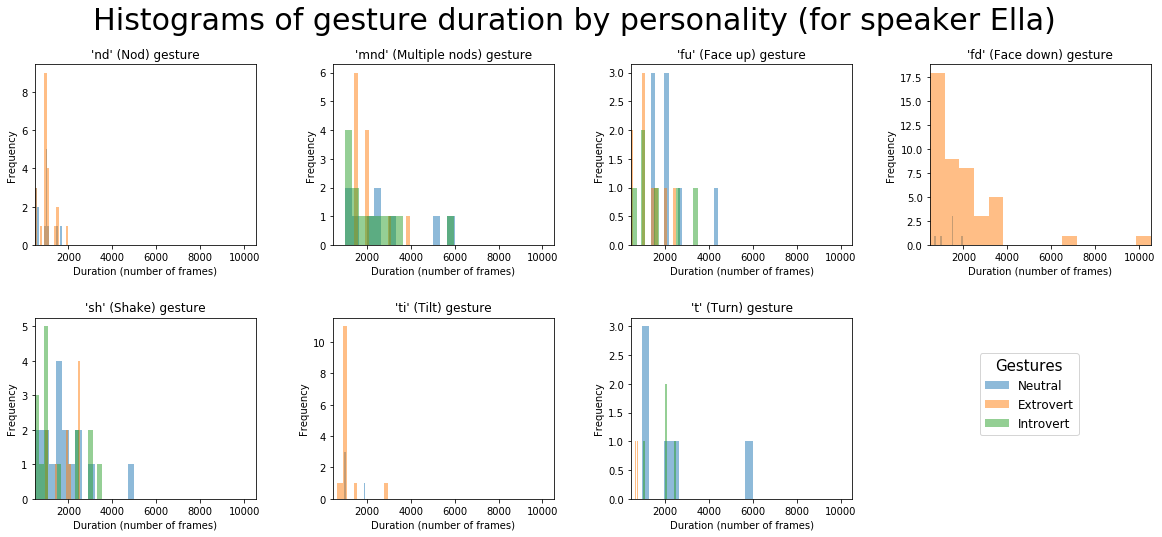

In [6]:
speakers = ['Adam', 'Beve', 'Brian', 'Ella', 'Esmo', 'Sophie']
plot_speaker_gesture_durations_by_personality('Ella')